In [1]:
import chess
from bot import ChessBot
import numpy as np
from pystockfish import Engine
from IPython.display import clear_output
from IPython.core.display import display

board = chess.Board()
gruefish = ChessBot()

In [ ]:
gruefish_black = ChessBot()
gruefish_black.explore = 0.5
gruefish_black.init_explore = 0.6

In [2]:
shitfish = Engine(depth=8, param={"Threads": 1, "Hash": 64})
shitfish.newgame()

In [ ]:
stockfish = Engine(depth=20, param={"Threads": 12})
stockfish.newgame()

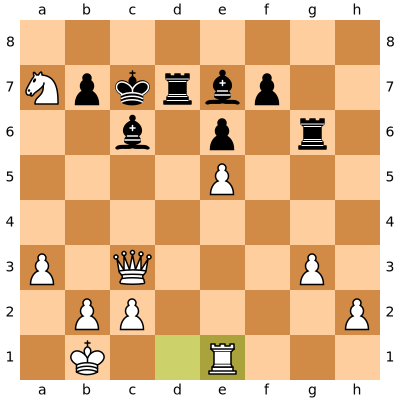

In [12]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])
    else:
        move = gruefish.best_move(board, time_limit=0, depth=35, debug=True)
        board.push_uci(move['move'])

board

In [3]:
gruefish.game.meta_data

{'check_result_time': 0.0,
 'expand_time': 11.117319107055664,
 'infer_time': 8.693557024002075,
 'inferences': 5668,
 'input_gen_time': 0.0,
 'move_validation_time': 0.0,
 'pop_time': 0.004502296447753906,
 'push_time': 0.0356144905090332}

In [4]:
gruefish.meta_data

{'backprop_time': 0.04458308219909668,
 'choose_move_time': 0.045107364654541016,
 'explored_moves': 0.010039806365966797,
 'unexplored_maths': 0,
 'unexplored_moves': 0.01804065704345703}

In [5]:
fen = board.fen()
print(fen)
fen = '4r3/8/8/8/5k2/3K4/8/8 b - - 15 8'
board = chess.Board(fen=fen)

7r/8/8/4k3/2K5/8/8/8 b - - 37 19


In [10]:
board.reset()

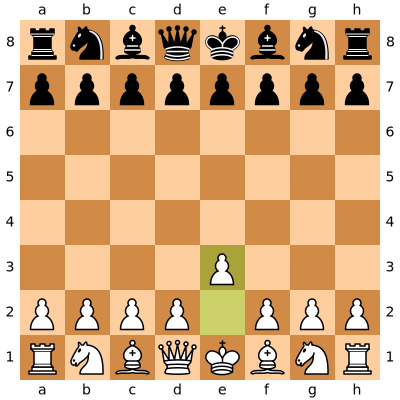

{'score': 0.5040303, 'visits': 0}
total simulations: 1076 depth: 8 max depth: -9
{'move': 'c7c5', 'score': 0.5031576259765549, 'weight': 0.049458463, 'visits': 192}
{'move': 'd7d5', 'score': 0.5014820897673173, 'weight': 0.015430292, 'visits': 127}
{'move': 'e7e5', 'score': 0.4889055455643252, 'weight': 0.64476633, 'visits': 118}
total simulations: 2393 depth: 8 max depth: -9
{'move': 'd7d5', 'score': 0.5117858805420453, 'lower_bound': 0.4822597996130223, 'weight': 0.015430292, 'visits': 356}
{'move': 'b8c6', 'score': 0.5070980254583001, 'lower_bound': 0.4811991490246127, 'weight': 0.018770382, 'visits': 463}
{'move': 'c7c5', 'score': 0.4976617097274092, 'lower_bound': 0.4642623753144546, 'weight': 0.049458463, 'visits': 278}
best move
{'move': 'b8c6', 'score': 0.5070980254583001, 'lower_bound': 0.4811991490246127, 'weight': 0.018770382, 'visits': 463}


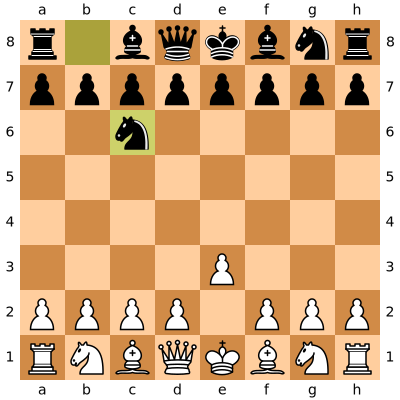

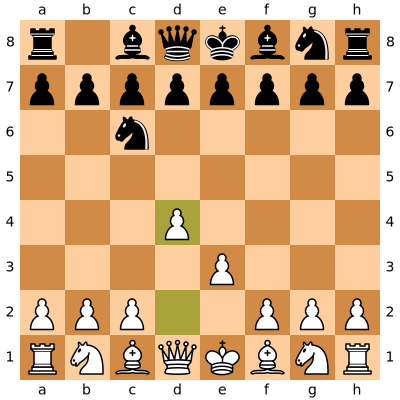

{'score': 0.4724473, 'visits': 0}
total simulations: 1148 depth: 8 max depth: -6
{'move': 'd7d6', 'score': 0.49198617675419354, 'weight': 0.0017952186, 'visits': 410}
{'move': 'g8f6', 'score': 0.4803896212457962, 'weight': 0.15616135, 'visits': 305}
{'move': 'c6b8', 'score': 0.46640675482639304, 'weight': 0.004139014, 'visits': 139}
total simulations: 2360 depth: 8 max depth: -7
{'move': 'd7d6', 'score': 0.4858699379786292, 'lower_bound': 0.4669293592825217, 'weight': 0.0017952186, 'visits': 865}
{'move': 'g8f6', 'score': 0.4765525953544413, 'lower_bound': 0.44864864168682883, 'weight': 0.15616135, 'visits': 398}
{'move': 'e7e5', 'score': 0.47549624792209433, 'lower_bound': 0.44448273735959964, 'weight': 0.8319845, 'visits': 322}


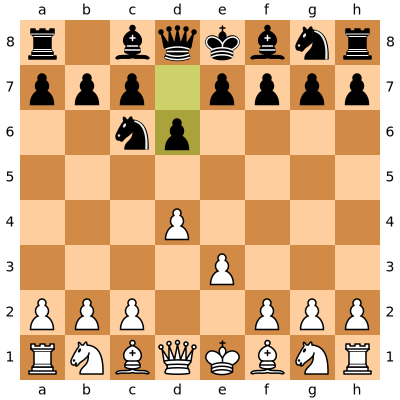

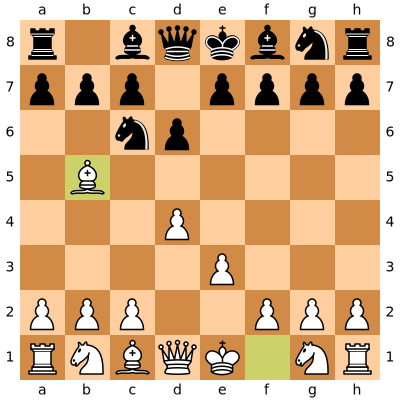

{'score': 0.47348076, 'visits': 0}
total simulations: 851 depth: 8 max depth: -6
{'move': 'g8f6', 'score': 0.4895810185148446, 'weight': 0.2366485, 'visits': 152}
{'move': 'a7a6', 'score': 0.4963607251202061, 'weight': 0.24779981, 'visits': 140}
{'move': 'e7e5', 'score': 0.48169747722188794, 'weight': 0.3611068, 'visits': 118}
total simulations: 1948 depth: 8 max depth: -6
{'move': 'a7a6', 'score': 0.4906207734427245, 'lower_bound': 0.4634024283787736, 'weight': 0.24779981, 'visits': 408}
{'move': 'g8f6', 'score': 0.48441939232805276, 'lower_bound': 0.4512255885261764, 'weight': 0.2366485, 'visits': 274}
{'move': 'g7g6', 'score': 0.48107612123814514, 'lower_bound': 0.4469382295915, 'weight': 0.018128894, 'visits': 259}


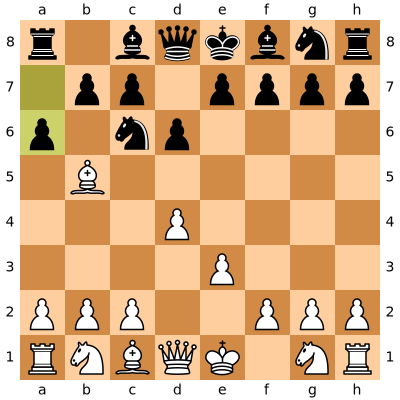

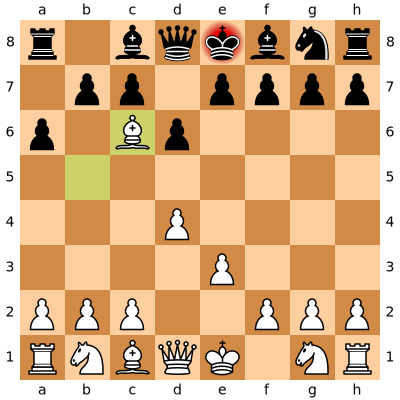

{'score': 0.4440152, 'visits': 0}
total simulations: 1070 depth: 8 max depth: -7
{'move': 'b7c6', 'score': 0.4727669861825271, 'weight': 0.99232155, 'visits': 1058}
{'move': 'c8d7', 'score': 0.2910126422062732, 'weight': 0.007150771, 'visits': 12}


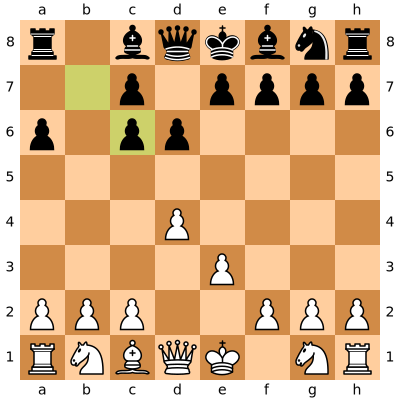

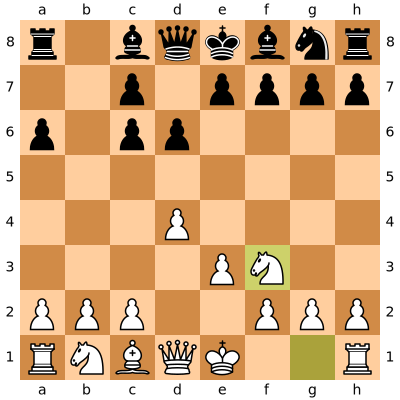

{'score': 0.48157668, 'visits': 0}
total simulations: 773 depth: 8 max depth: -4
{'move': 'e7e5', 'score': 0.49482345779599224, 'weight': 0.20310307, 'visits': 107}
{'move': 'g8f6', 'score': 0.4966691381438795, 'weight': 0.0359773, 'visits': 96}
{'move': 'c6c5', 'score': 0.48443619747908273, 'weight': 0.48775917, 'visits': 79}
total simulations: 1653 depth: 8 max depth: -4
{'move': 'g8f6', 'score': 0.49117874496253844, 'lower_bound': 0.46169451412462015, 'weight': 0.0359773, 'visits': 340}
{'move': 'c6c5', 'score': 0.4840424388150091, 'lower_bound': 0.4447493311825851, 'weight': 0.48775917, 'visits': 191}
{'move': 'e7e5', 'score': 0.4727516100018918, 'lower_bound': 0.4348171957891123, 'weight': 0.20310307, 'visits': 205}


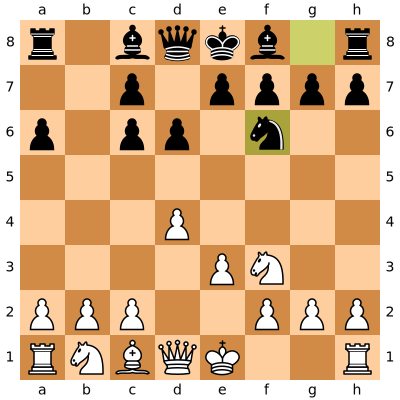

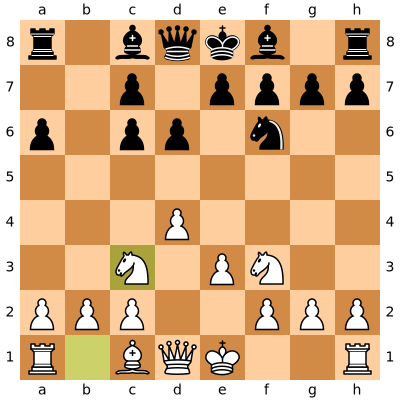

{'score': 0.5005425, 'visits': 0}
total simulations: 871 depth: 8 max depth: -4
{'move': 'c8b7', 'score': 0.49355855653927283, 'weight': 0.0032342935, 'visits': 96}
{'move': 'f6d7', 'score': 0.5050676116978822, 'weight': 0.058177967, 'visits': 94}
{'move': 'a6a5', 'score': 0.4878751628156033, 'weight': 0.0332663, 'visits': 75}
total simulations: 1859 depth: 8 max depth: -4
{'move': 'f6d7', 'score': 0.4963202103948209, 'lower_bound': 0.4622221646923618, 'weight': 0.058177967, 'visits': 258}
{'move': 'e7e6', 'score': 0.4953950393694109, 'lower_bound': 0.46181171069207794, 'weight': 0.022816911, 'visits': 266}
{'move': 'c8b7', 'score': 0.4944995537330473, 'lower_bound': 0.45907749900554917, 'weight': 0.0032342935, 'visits': 239}


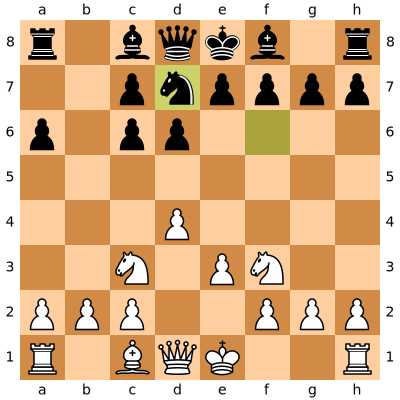

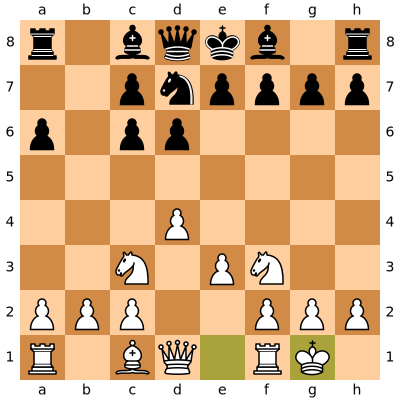

{'score': 0.49100086, 'visits': 0}
total simulations: 864 depth: 8 max depth: -5
{'move': 'g7g6', 'score': 0.5170452959356158, 'weight': 0.088245824, 'visits': 136}
{'move': 'e7e6', 'score': 0.5073335933619083, 'weight': 0.008176234, 'visits': 122}
{'move': 'e7e5', 'score': 0.4611233045896417, 'weight': 0.6730533, 'visits': 92}
total simulations: 1783 depth: 8 max depth: -5
{'move': 'g7g6', 'score': 0.5140352338313693, 'lower_bound': 0.485851273321154, 'weight': 0.088245824, 'visits': 376}
{'move': 'e7e6', 'score': 0.5102600064181372, 'lower_bound': 0.47892550584267823, 'weight': 0.008176234, 'visits': 304}
{'move': 'c6c5', 'score': 0.4954786181665496, 'lower_bound': 0.4543460275081809, 'weight': 0.12681249, 'visits': 176}


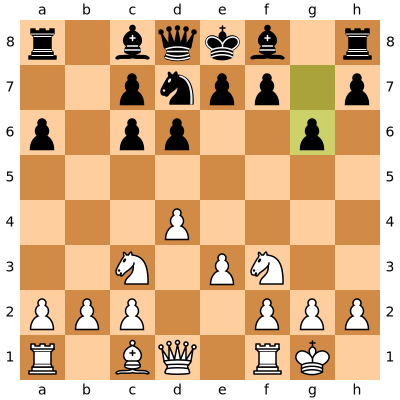

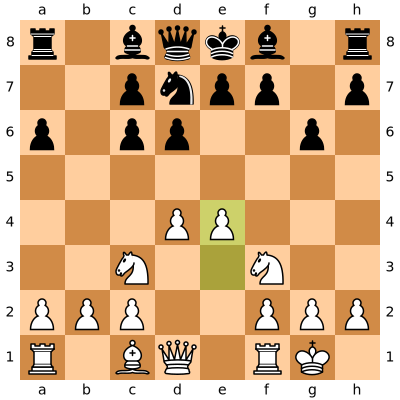

{'score': 0.47456408, 'visits': 0}
total simulations: 809 depth: 8 max depth: -5
{'move': 'f8g7', 'score': 0.5243087371064497, 'weight': 0.27418602, 'visits': 317}
{'move': 'c8b7', 'score': 0.4998204190132869, 'weight': 0.013068699, 'visits': 98}
{'move': 'c6c5', 'score': 0.4935509513141547, 'weight': 0.392477, 'visits': 90}
total simulations: 1746 depth: 8 max depth: -5
{'move': 'f8g7', 'score': 0.5139490587769109, 'lower_bound': 0.4943320357278884, 'weight': 0.27418602, 'visits': 775}
{'move': 'c8b7', 'score': 0.49639489685421345, 'lower_bound': 0.46396804458782465, 'weight': 0.013068699, 'visits': 283}
{'move': 'a8b8', 'score': 0.4852983401779376, 'lower_bound': 0.4338910464902201, 'weight': 0.021243569, 'visits': 112}


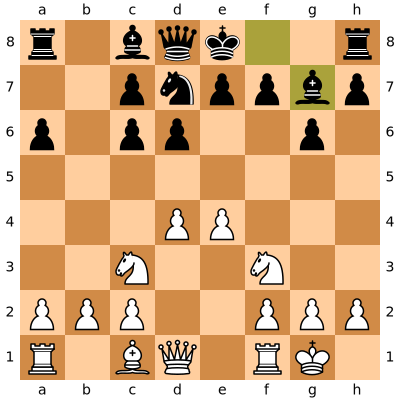

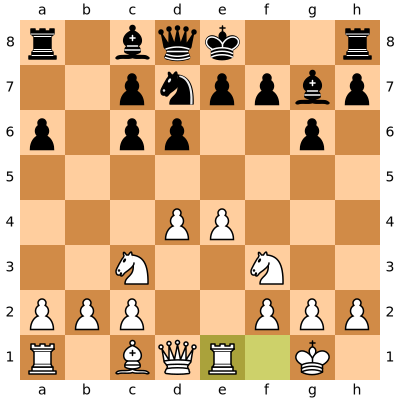

{'score': 0.5000001, 'visits': 0}
total simulations: 826 depth: 8 max depth: -4
{'move': 'c6c5', 'score': 0.5338055697805323, 'weight': 0.5103073, 'visits': 286}
{'move': 'e8g8', 'score': 0.5334144519821713, 'weight': 0.16032712, 'visits': 134}
{'move': 'c8b7', 'score': 0.502582084533678, 'weight': 0.0055736764, 'visits': 72}
total simulations: 1761 depth: 8 max depth: -4
{'move': 'c6c5', 'score': 0.5315337487360678, 'lower_bound': 0.5074163239254903, 'weight': 0.5103073, 'visits': 513}
{'move': 'e8g8', 'score': 0.5307002262608473, 'lower_bound': 0.5053166094862422, 'weight': 0.16032712, 'visits': 463}
{'move': 'a8b8', 'score': 0.5122081146761973, 'lower_bound': 0.4669562932294808, 'weight': 0.037802268, 'visits': 145}


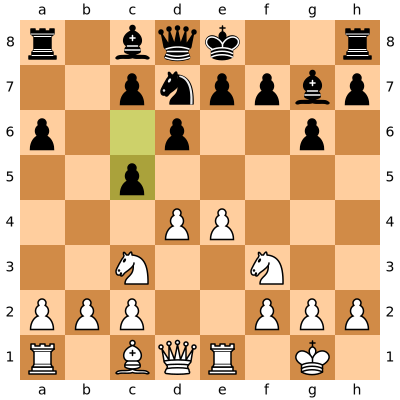

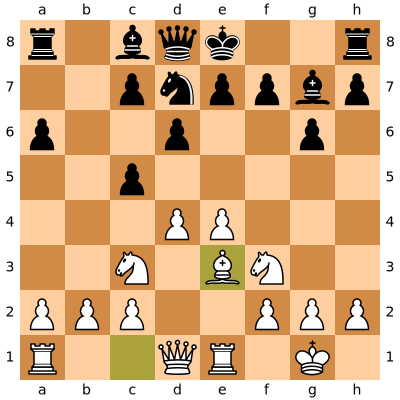

{'score': 0.5153766, 'visits': 0}
total simulations: 871 depth: 8 max depth: -6
{'move': 'a8b8', 'score': 0.5179571748899849, 'weight': 0.122363366, 'visits': 161}
{'move': 'c8b7', 'score': 0.5081423255651646, 'weight': 0.017909065, 'visits': 99}
{'move': 'g7d4', 'score': 0.47179569599654336, 'weight': 0.0009919943, 'visits': 78}
total simulations: 1926 depth: 8 max depth: -6
{'move': 'a8b8', 'score': 0.5262671056801277, 'lower_bound': 0.504141077035414, 'weight': 0.122363366, 'visits': 617}
{'move': 'c8b7', 'score': 0.5162553917968715, 'lower_bound': 0.4822085012812902, 'weight': 0.017909065, 'visits': 260}
{'move': 'd7f8', 'score': 0.5088554928261301, 'lower_bound': 0.4716869401330344, 'weight': 0.0009600115, 'visits': 218}


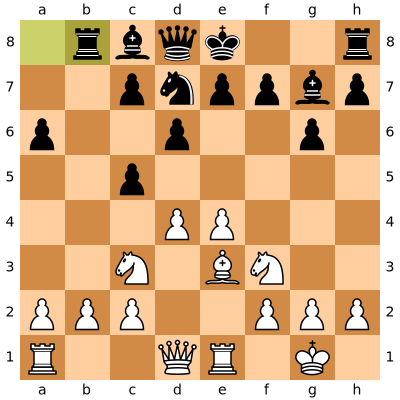

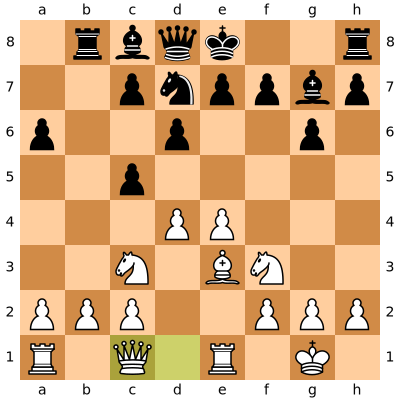

{'score': 0.5552809, 'visits': 0}
total simulations: 1082 depth: 8 max depth: -5
{'move': 'c5d4', 'score': 0.5371380806405297, 'weight': 0.6089589, 'visits': 247}
{'move': 'h7h6', 'score': 0.5386388035331994, 'weight': 0.023853576, 'visits': 186}
{'move': 'c7c6', 'score': 0.4992420220904228, 'weight': 0.016891666, 'visits': 58}
total simulations: 2176 depth: 8 max depth: -5
{'move': 'c5d4', 'score': 0.5479017056842675, 'lower_bound': 0.5247184843262707, 'weight': 0.6089589, 'visits': 571}
{'move': 'h7h6', 'score': 0.523375555305701, 'lower_bound': 0.49712101811723247, 'weight': 0.023853576, 'visits': 445}
{'move': 'g7d4', 'score': 0.5151688455446567, 'lower_bound': 0.47372640902832774, 'weight': 0.0018924724, 'visits': 178}


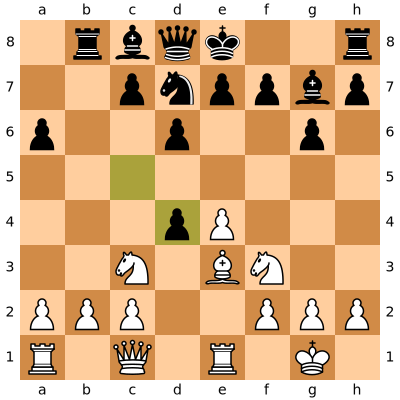

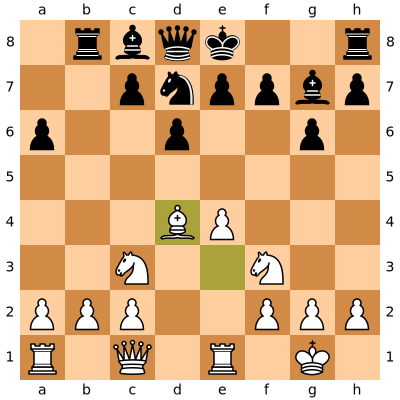

{'score': 0.5551341, 'visits': 0}
total simulations: 821 depth: 8 max depth: -4
{'move': 'd7f6', 'score': 0.553673871936374, 'weight': 0.027509393, 'visits': 309}
{'move': 'e7e5', 'score': 0.5245115387828415, 'weight': 0.2377877, 'visits': 87}
{'move': 'g7d4', 'score': 0.49211120930641494, 'weight': 0.17606993, 'visits': 85}
total simulations: 1913 depth: 8 max depth: -4
{'move': 'd7f6', 'score': 0.5309194134747101, 'lower_bound': 0.5108836545100109, 'weight': 0.027509393, 'visits': 752}
{'move': 'd7e5', 'score': 0.5154324258095553, 'lower_bound': 0.4867331951768103, 'weight': 0.01654891, 'visits': 366}
{'move': 'e7e5', 'score': 0.5158794512770754, 'lower_bound': 0.4845008125711418, 'weight': 0.2377877, 'visits': 306}


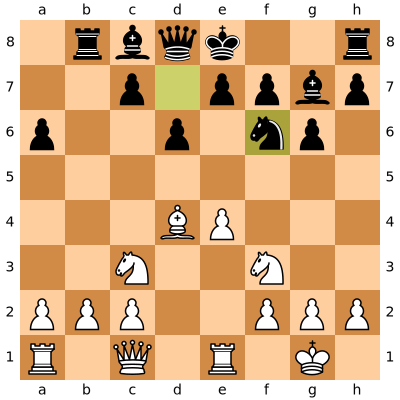

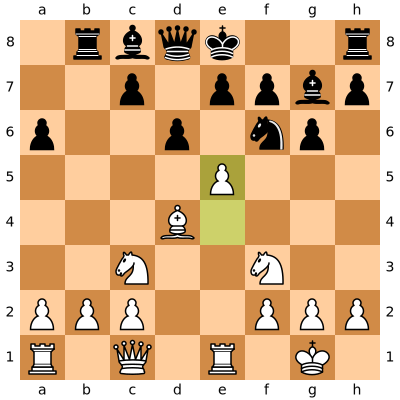

{'score': 0.47401258, 'visits': 0}
total simulations: 728 depth: 8 max depth: -4
{'move': 'd6e5', 'score': 0.4773860412690287, 'weight': 0.47079962, 'visits': 268}
{'move': 'f6g4', 'score': 0.4544113996325916, 'weight': 0.2558219, 'visits': 223}
{'move': 'f6d7', 'score': 0.44311038512699286, 'weight': 0.16751215, 'visits': 83}
total simulations: 1747 depth: 8 max depth: -4
{'move': 'd6e5', 'score': 0.45875037025665155, 'lower_bound': 0.43796098807828104, 'weight': 0.47079962, 'visits': 690}
{'move': 'f6g4', 'score': 0.4350185704569062, 'lower_bound': 0.40978410058703846, 'weight': 0.2558219, 'visits': 468}
{'move': 'f6h5', 'score': 0.430035562351758, 'lower_bound': 0.39816373665955, 'weight': 0.039766073, 'visits': 293}


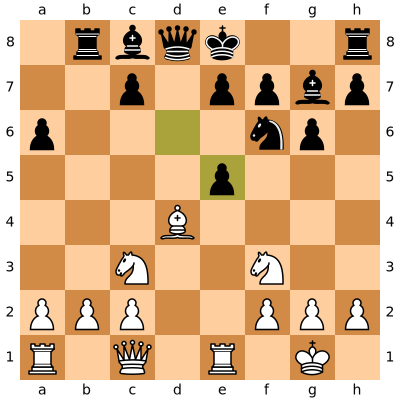

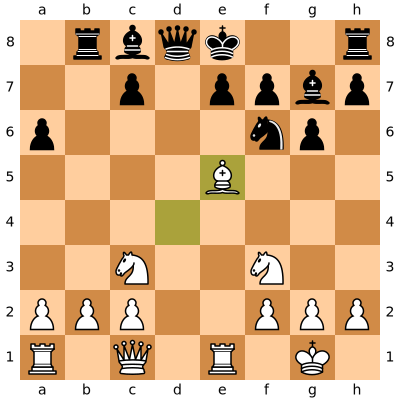

{'score': 0.50321895, 'visits': 0}
total simulations: 632 depth: 8 max depth: -3
{'move': 'e8g8', 'score': 0.48924017472429504, 'weight': 0.8068532, 'visits': 95}
{'move': 'c8b7', 'score': 0.4855530850041576, 'weight': 0.040595643, 'visits': 69}
{'move': 'b8b4', 'score': 0.4204486453462599, 'weight': 0.0015298427, 'visits': 47}
total simulations: 1530 depth: 8 max depth: -3
{'move': 'c8b7', 'score': 0.48463700485037275, 'lower_bound': 0.461415443502233, 'weight': 0.040595643, 'visits': 543}
{'move': 'b8a8', 'score': 0.473079829899685, 'lower_bound': 0.4354349692226578, 'weight': 0.004296487, 'visits': 206}
{'move': 'e8g8', 'score': 0.46759408222708243, 'lower_bound': 0.4236632861841862, 'weight': 0.8068532, 'visits': 151}


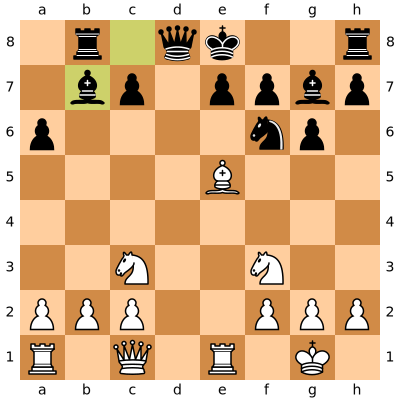

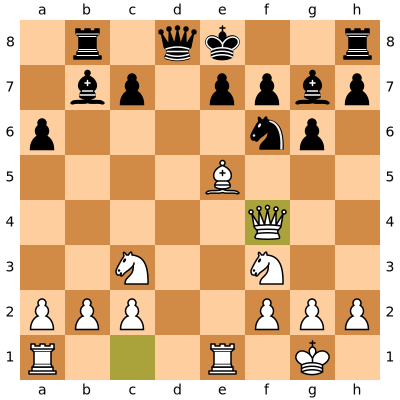

{'score': 0.41108626, 'visits': 0}
total simulations: 855 depth: 8 max depth: -4
{'move': 'd8c8', 'score': 0.44467078541360827, 'weight': 0.03123718, 'visits': 446}
{'move': 'f6h5', 'score': 0.40810051387644064, 'weight': 0.05150877, 'visits': 104}
{'move': 'e8g8', 'score': 0.40524565968406767, 'weight': 0.46034217, 'visits': 76}
total simulations: 1841 depth: 8 max depth: -4
{'move': 'd8c8', 'score': 0.45152300295792136, 'lower_bound': 0.43152485514898553, 'weight': 0.03123718, 'visits': 751}
{'move': 'b7f3', 'score': 0.4399590124080841, 'lower_bound': 0.41853118970581893, 'weight': 0.21370162, 'visits': 654}
{'move': 'f6h5', 'score': 0.39076861198715884, 'lower_bound': 0.340068868341369, 'weight': 0.05150877, 'visits': 116}


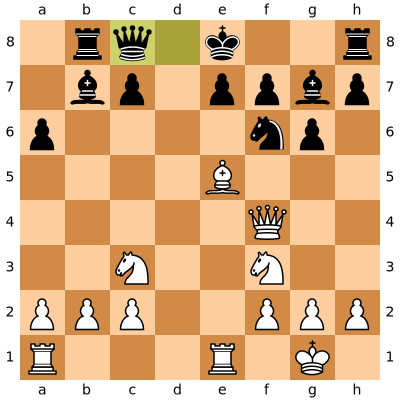

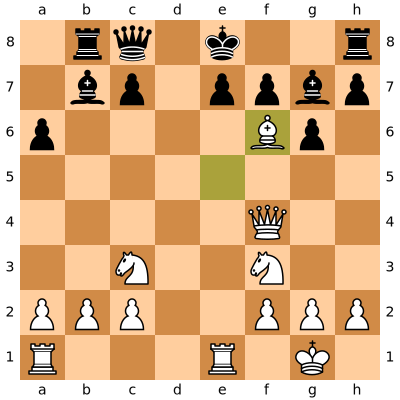

{'score': 0.27774906, 'visits': 0}
total simulations: 898 depth: 8 max depth: -6
{'move': 'g7f6', 'score': 0.16688000052529606, 'weight': 0.859875, 'visits': 340}
{'move': 'g6g5', 'score': 0.2138466558164338, 'weight': 0.0041942904, 'visits': 110}
{'move': 'e8g8', 'score': 0.12043345885702617, 'weight': 0.033975422, 'visits': 51}
total simulations: 1824 depth: 8 max depth: -6
{'move': 'g7f6', 'score': 0.15243084480725544, 'lower_bound': 0.1240911648230698, 'weight': 0.859875, 'visits': 373}
{'move': 'g7f8', 'score': 0.16081284475783209, 'lower_bound': 0.10948201114582001, 'weight': 0.007839449, 'visits': 113}
{'move': 'g6g5', 'score': 0.1420818975990089, 'lower_bound': 0.10720946317358165, 'weight': 0.0041942904, 'visits': 246}


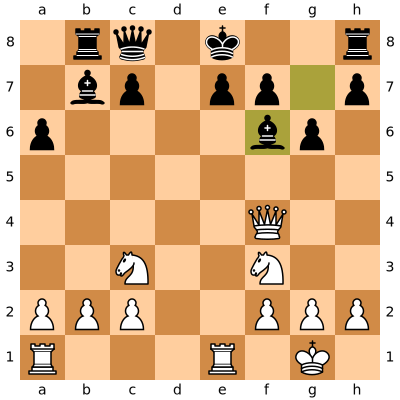

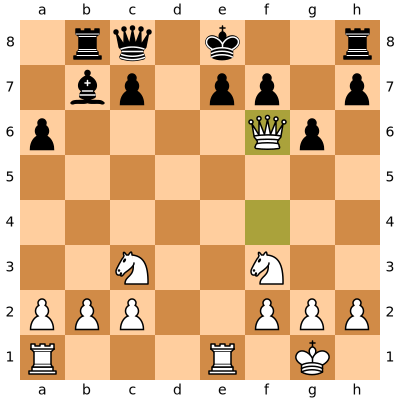

{'score': 0.20608433, 'visits': 0}
total simulations: 964 depth: 8 max depth: -3
{'move': 'e8g8', 'score': 0.1737668948006591, 'weight': 0.25995392, 'visits': 587}
{'move': 'c8g4', 'score': 0.08781609749107344, 'weight': 0.01985974, 'visits': 39}
{'move': 'e7e5', 'score': 0.03308304231219561, 'weight': 0.0040798048, 'visits': 34}
total simulations: 1926 depth: 8 max depth: -3
{'move': 'e8g8', 'score': 0.16733071250739895, 'lower_bound': 0.15328232007623735, 'weight': 0.25995392, 'visits': 1532}
{'move': 'e7e6', 'score': 0.08264234201258869, 'lower_bound': -0.005435244230301228, 'weight': 0.19309662, 'visits': 38}
{'move': 'c8g4', 'score': 0.07924951433570171, 'lower_bound': -0.0066529809766701226, 'weight': 0.01985974, 'visits': 40}


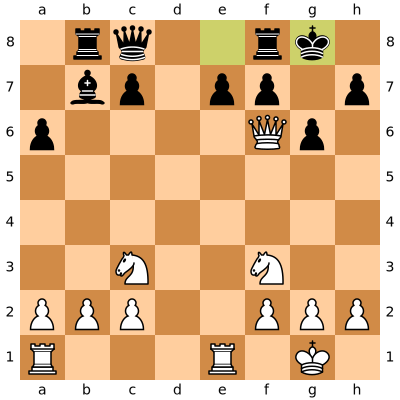

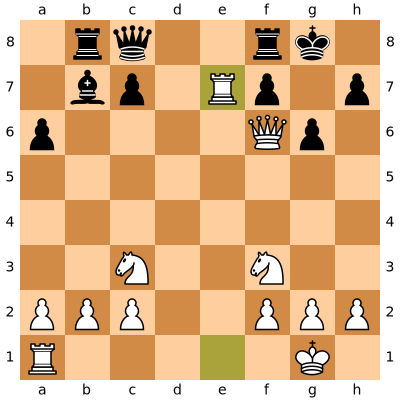

{'score': 0.10476163, 'visits': 0}
total simulations: 774 depth: 8 max depth: -2
{'move': 'c8d8', 'score': 0.21030754369210192, 'weight': 0.17836982, 'visits': 277}
{'move': 'b7a8', 'score': 0.19326624682761528, 'weight': 0.033546384, 'visits': 238}
{'move': 'c7c6', 'score': 0.14744360706645132, 'weight': 0.008347506, 'visits': 40}
total simulations: 1622 depth: 8 max depth: -3
{'move': 'b7a8', 'score': 0.1790401880536946, 'lower_bound': 0.15695121171382004, 'weight': 0.033546384, 'visits': 605}
{'move': 'c8d8', 'score': 0.16640826232171513, 'lower_bound': 0.13955358281394892, 'weight': 0.17836982, 'visits': 409}
{'move': 'c8g4', 'score': 0.1528903303668694, 'lower_bound': 0.11491207839380357, 'weight': 0.10666094, 'visits': 204}


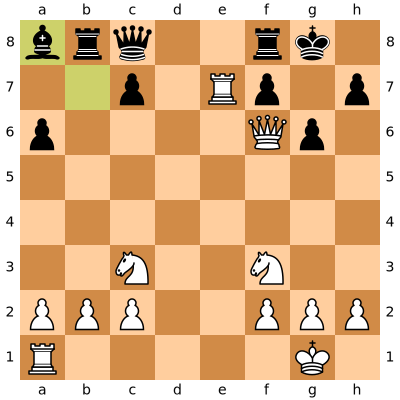

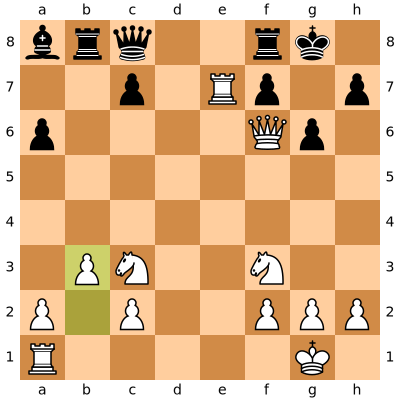

{'score': 0.1334454, 'visits': 0}
total simulations: 765 depth: 8 max depth: -5
{'move': 'b8b6', 'score': 0.23269450561621152, 'weight': 0.26262024, 'visits': 189}
{'move': 'g6g5', 'score': 0.22351902603444174, 'weight': 0.0035372523, 'visits': 119}
{'move': 'b8b7', 'score': 0.19857263903247757, 'weight': 0.011259186, 'visits': 91}
total simulations: 1697 depth: 8 max depth: -5
{'move': 'b8b6', 'score': 0.20195246376993592, 'lower_bound': 0.1725451273042121, 'weight': 0.26262024, 'visits': 343}
{'move': 'a8f3', 'score': 0.19879951155012243, 'lower_bound': 0.16185868019179653, 'weight': 0.065278396, 'visits': 217}
{'move': 'h7h6', 'score': 0.18736902723952864, 'lower_bound': 0.15649042630372312, 'weight': 0.024646137, 'visits': 311}


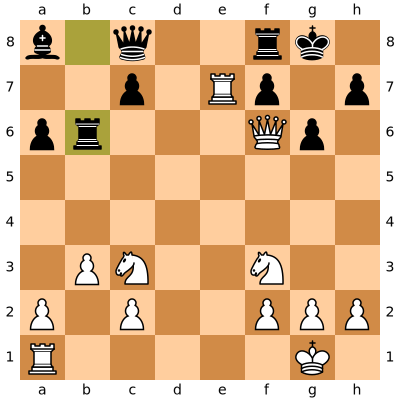

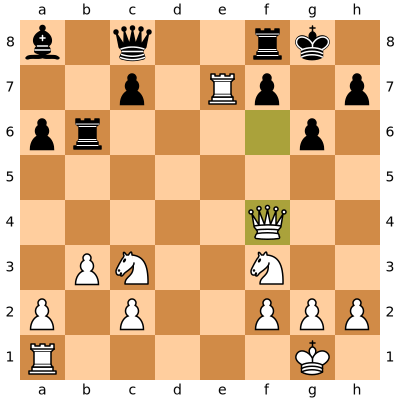

{'score': 0.14380616, 'visits': 0}
total simulations: 638 depth: 8 max depth: -2
{'move': 'c7c5', 'score': 0.25349126605604577, 'weight': 0.023617443, 'visits': 73}
{'move': 'c8b7', 'score': 0.23268728802937177, 'weight': 0.0046967524, 'visits': 59}
{'move': 'a6a5', 'score': 0.25051119260691657, 'weight': 0.0044615273, 'visits': 51}
total simulations: 1491 depth: 8 max depth: -2
{'move': 'b6f6', 'score': 0.18838451693708902, 'lower_bound': 0.1431721268388489, 'weight': 0.02159126, 'visits': 142}
{'move': 'c8b7', 'score': 0.18567083714292976, 'lower_bound': 0.14152600647307303, 'weight': 0.0046967524, 'visits': 149}
{'move': 'c7c5', 'score': 0.18116767543279255, 'lower_bound': 0.13563575916740553, 'weight': 0.023617443, 'visits': 140}


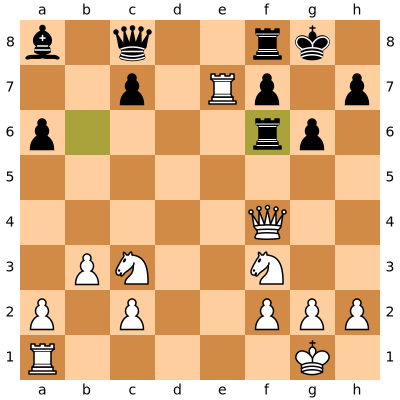

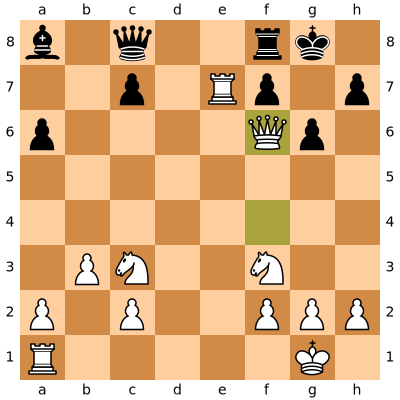

{'score': 0.05025096, 'visits': 0}
total simulations: 735 depth: 8 max depth: -2
{'move': 'c8b7', 'score': 0.17107213687065081, 'weight': 0.045951925, 'visits': 446}
{'move': 'c8g4', 'score': 0.02381177203290219, 'weight': 0.11246703, 'visits': 32}
{'move': 'a8f3', 'score': 0.040404320451339015, 'weight': 0.09261676, 'visits': 22}


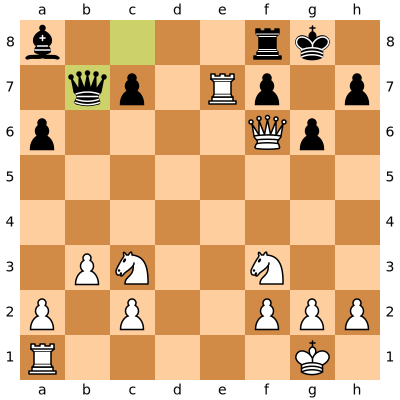

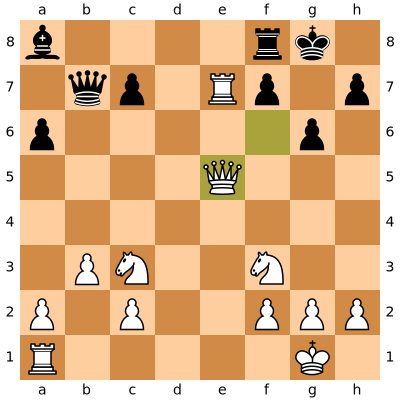

{'score': 0.07977598, 'visits': 0}
total simulations: 780 depth: 8 max depth: -2
{'move': 'g6g5', 'score': 0.1866121288309175, 'weight': 0.017310929, 'visits': 202}
{'move': 'h7h5', 'score': 0.1538377975686187, 'weight': 0.050847534, 'visits': 167}
{'move': 'f8d8', 'score': 0.08573524334478866, 'weight': 0.022284959, 'visits': 55}
total simulations: 1681 depth: 8 max depth: -2
{'move': 'g6g5', 'score': 0.12151481323520008, 'lower_bound': 0.09909331816944647, 'weight': 0.017310929, 'visits': 590}
{'move': 'h7h5', 'score': 0.12149028867080625, 'lower_bound': 0.09466877506132798, 'weight': 0.050847534, 'visits': 412}
{'move': 'f8c8', 'score': 0.09521149361900294, 'lower_bound': 0.04201736991728676, 'weight': 0.03711492, 'visits': 104}
best move
{'move': 'h7h5', 'score': 0.12149028867080625, 'lower_bound': 0.09466877506132798, 'weight': 0.050847534, 'visits': 412}


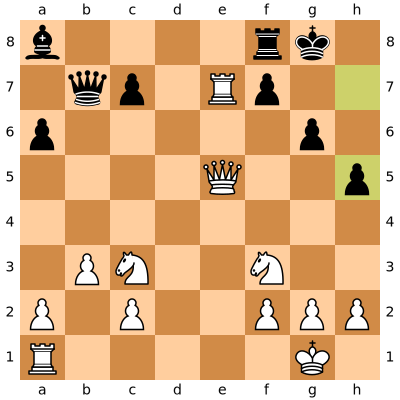

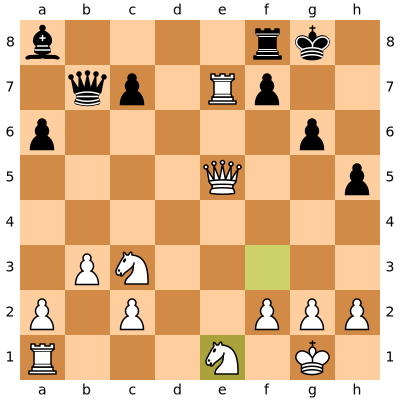

{'score': 0.09139017, 'visits': 0}
total simulations: 719 depth: 8 max depth: -1
{'move': 'b7a7', 'score': 0.07451602339426588, 'weight': 0.064723425, 'visits': 59}
{'move': 'b7b6', 'score': 0.07521011807725975, 'weight': 0.07338393, 'visits': 59}
{'move': 'h5h4', 'score': 0.06341194103025649, 'weight': 0.04432035, 'visits': 55}
total simulations: 1624 depth: 8 max depth: -1
{'move': 'f8d8', 'score': 0.06527347513208426, 'lower_bound': 0.02451310912507223, 'weight': 0.020121602, 'visits': 177}
{'move': 'b7b6', 'score': 0.0650032968320654, 'lower_bound': 0.023658103725623394, 'weight': 0.07338393, 'visits': 172}
{'move': 'b7a7', 'score': 0.06655646434051188, 'lower_bound': 0.01517114440112842, 'weight': 0.064723425, 'visits': 111}
best move
{'move': 'b7b6', 'score': 0.0650032968320654, 'lower_bound': 0.023658103725623394, 'weight': 0.07338393, 'visits': 172}


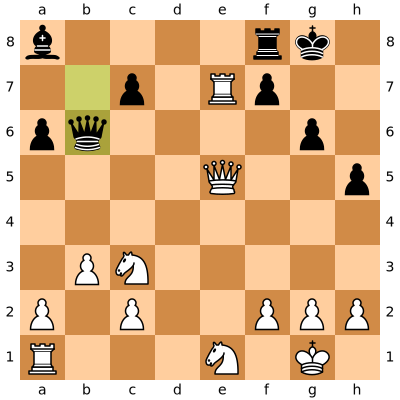

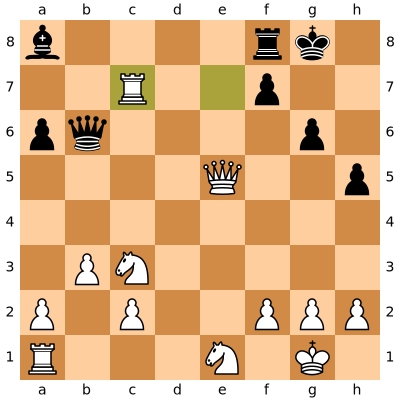

{'score': 0.040301498, 'visits': 0}
total simulations: 725 depth: 8 max depth: -2
{'move': 'b6b8', 'score': 0.10954947777701207, 'weight': 0.034644328, 'visits': 125}
{'move': 'g8h7', 'score': 0.06399593816688776, 'weight': 0.062632285, 'visits': 62}
{'move': 'a8c6', 'score': 0.08671513043506596, 'weight': 0.046878822, 'visits': 42}
total simulations: 1567 depth: 8 max depth: -2
{'move': 'b6b8', 'score': 0.10864626059548688, 'lower_bound': 0.08211189865246141, 'weight': 0.034644328, 'visits': 417}
{'move': 'a8b7', 'score': 0.08904845408781314, 'lower_bound': 0.042868101276567566, 'weight': 0.035526928, 'visits': 137}
{'move': 'h5h4', 'score': 0.08354987345023412, 'lower_bound': 0.03443456515948634, 'weight': 0.068334006, 'visits': 121}


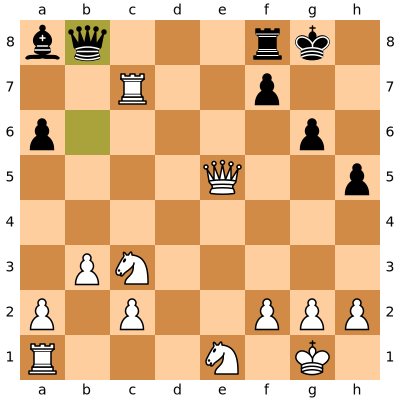

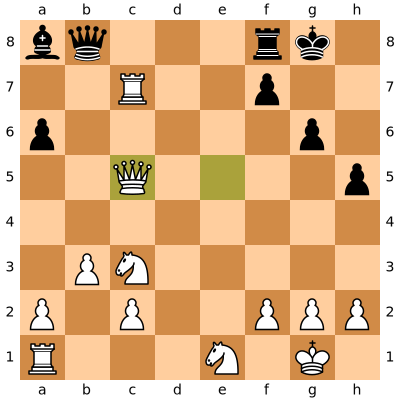

{'score': 0.05724506, 'visits': 0}
total simulations: 681 depth: 8 max depth: 0
{'move': 'b8b6', 'score': 0.10663006874591585, 'weight': 0.0053875837, 'visits': 87}
{'move': 'b8d8', 'score': 0.10296627402917602, 'weight': 0.092155054, 'visits': 60}
{'move': 'b8e8', 'score': 0.07996384237472032, 'weight': 0.12905513, 'visits': 59}
total simulations: 1453 depth: 8 max depth: 0
{'move': 'b8b6', 'score': 0.10592603666078382, 'lower_bound': 0.06795243025079314, 'weight': 0.0053875837, 'visits': 201}
{'move': 'f8e8', 'score': 0.08961374675110956, 'lower_bound': 0.03791925373227179, 'weight': 0.18473658, 'visits': 108}
{'move': 'g8g7', 'score': 0.08599347247328482, 'lower_bound': 0.03499601575065758, 'weight': 0.06550233, 'visits': 111}


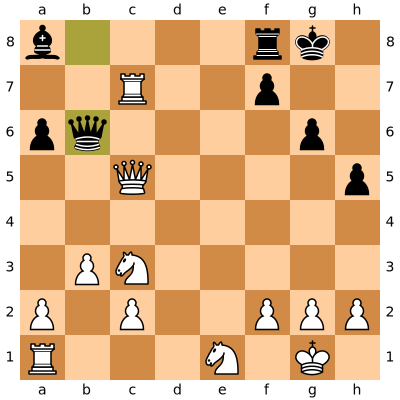

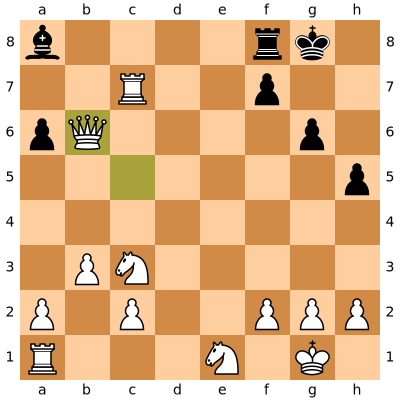

{'score': 0.011904107, 'visits': 0}
total simulations: 714 depth: 8 max depth: 0
{'move': 'f8e8', 'score': 0.09844108693233178, 'weight': 0.08109733, 'visits': 150}
{'move': 'g8g7', 'score': 0.09042279195736191, 'weight': 0.09956742, 'visits': 115}
{'move': 'f8d8', 'score': 0.06284343879544552, 'weight': 0.051391527, 'visits': 69}
total simulations: 1478 depth: 8 max depth: 0
{'move': 'f8e8', 'score': 0.08058382755057858, 'lower_bound': 0.04769992072962728, 'weight': 0.08109733, 'visits': 269}
{'move': 'g8g7', 'score': 0.07561687328048583, 'lower_bound': 0.04210655004280325, 'weight': 0.09956742, 'visits': 259}
{'move': 'g8h7', 'score': 0.07036881582529209, 'lower_bound': 0.032721702544318644, 'weight': 0.07940781, 'visits': 205}


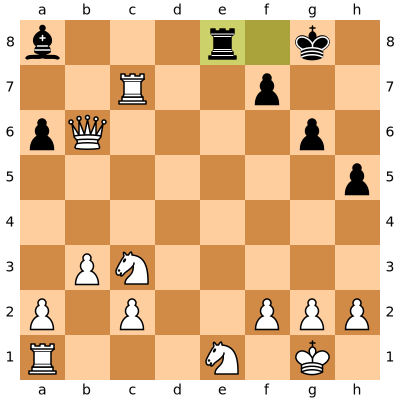

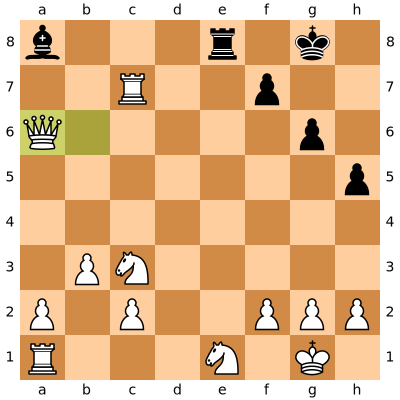

{'score': 0.008173664, 'visits': 0}
total simulations: 638 depth: 8 max depth: 0
{'move': 'e8e5', 'score': 0.0033289218828386202, 'weight': 0.0487205, 'visits': 48}
{'move': 'h5h4', 'score': 0.006394118461309994, 'weight': 0.07835868, 'visits': 47}
{'move': 'f7f6', 'score': -0.0005917590672848139, 'weight': 0.01740123, 'visits': 44}
total simulations: 1132 depth: 8 max depth: 0
{'move': 'g8g7', 'score': 0.025577897775329372, 'lower_bound': -0.04071984097300581, 'weight': 0.08189591, 'visits': 63}
{'move': 'e8e6', 'score': 0.01933547515741607, 'lower_bound': -0.05421526222856493, 'weight': 0.031915568, 'visits': 51}
{'move': 'e8f8', 'score': 0.009389318090912702, 'lower_bound': -0.0544611606040936, 'weight': 0.10071457, 'visits': 68}


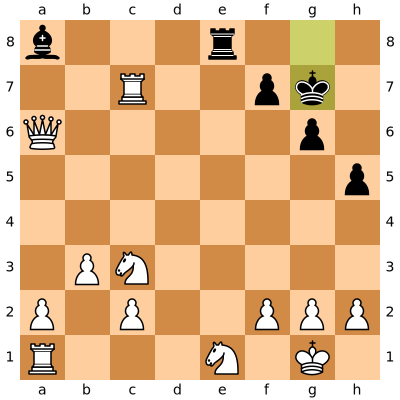

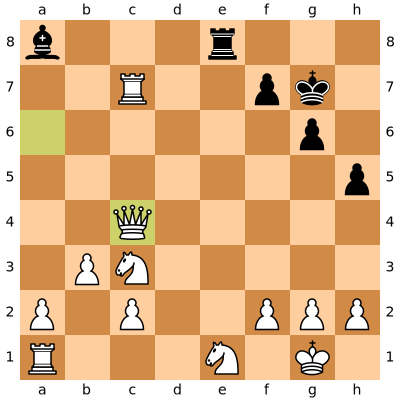

{'score': 0.010392727, 'visits': 0}
total simulations: 581 depth: 8 max depth: 0
{'move': 'e8f8', 'score': 0.0063585888450611305, 'weight': 0.382457, 'visits': 44}
{'move': 'a8d5', 'score': 0.0036371984376122324, 'weight': 0.012254728, 'visits': 40}
{'move': 'e8e6', 'score': 0.008133982389281647, 'weight': 0.02644425, 'visits': 29}


KeyboardInterrupt: 

In [3]:
while not board.is_game_over(claim_draw=True):
    if board.turn == chess.WHITE:
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])
#         clear_output()
        display(board)
    else:
        move = gruefish.best_move(board, depth=8, time_limit=20, debug=True, eval_freq=10)
        board.push_uci(move['move'])
        display(board)
        
print(board.result(claim_draw=True), len(board.move_stack))

In [17]:
board.is_game_over(claim_draw=True)

True

In [20]:
gruefish.game.result()

-1

In [18]:
board.can_claim_threefold_repetition()

True

In [4]:
gruefish.train_from_board(board)

In [ ]:
board.fen()

In [ ]:
board2= chess.Board(fen=board.fen())
board2.result()

In [23]:
temp_board = chess.Board()

In [30]:
temp_board = chess.Board(fen='4r3/8/8/8/5k2/3K4/8/8 b - - 15 8')

In [29]:
temp_board.pop()
temp_board

IndexError: pop from empty list

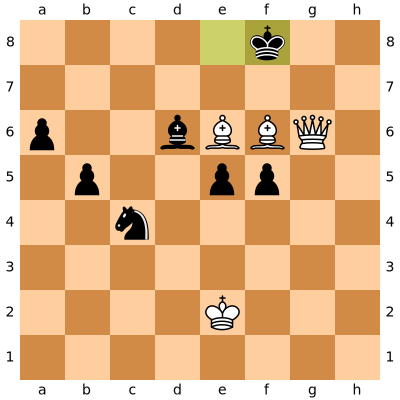

In [112]:
if len(board.move_stack) > len(temp_board.move_stack):
    temp_board.push(board.move_stack[len(temp_board.move_stack)])

temp_board

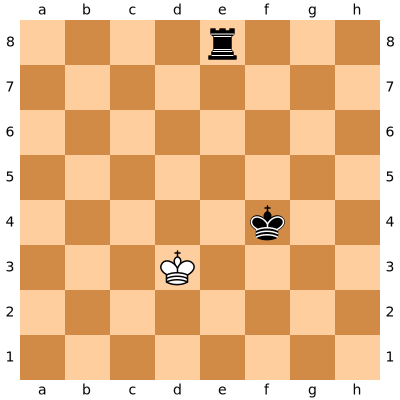

In [43]:
temp_board

In [45]:
gruefish.game.node_stack = []
move = gruefish.best_move(temp_board, depth=50, time_limit=0, debug=True)

{'visits': 0, 'score': 0.9955603}
total simulations: 1 depth: 50
{'score': 0.4999583333333333, 'visits': 1, 'weight': 0.3722908, 'move': 'f4f3', 'lower_bound': 0.3822173310817858}


{'visits': 2, 'score': 0.21441151}


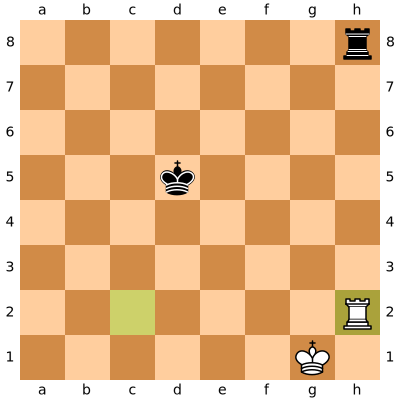

In [143]:
# temp_board.push_uci('c2h2')
temp_board.pop()
gruefish.game.set_position(temp_board)
print(gruefish.game.root())
temp_board

In [69]:
moves = gruefish.game.node().traverse([]).children()
moves.sort(key=lambda x: x['score'])
moves

[{'move': 'f4f5',
  'score': 0.5000416666666667,
  'visits': 1,
  'weight': 0.14619985}]

In [70]:
board.push_uci(moves[0]['move'])
gruefish.game.set_position(board)

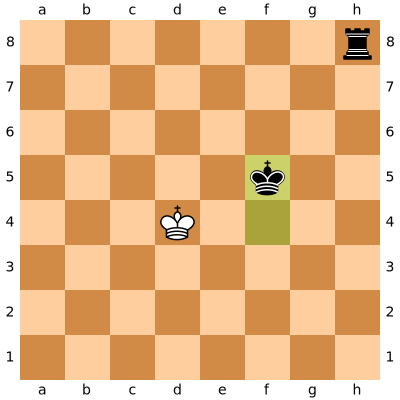

In [71]:
board

In [ ]:
stockfish.setfenposition(board.fen())
stockfish.bestmove()

In [ ]:
board.fen()

In [ ]:
bad_decisions = [
    'r1b1k2r/2p1q1pp/1pnppn2/p2P1p2/2P5/P1BBPN2/1P3PPP/R2Q1RK1 b kq - 0 11',
    '1rb1k2r/1p2ppbp/3P1np1/p1n1N3/Pqp5/2N5/1PPQBPPP/R1B2RK1 b k - 0 14',
    '1K6/7P/8/8/8/4k3/8/8 w - - 7 171',
    '8/8/8/2k4K/P3P3/8/7P/8 w - - 0 30',
    'r1bqk2r/1p1p1ppp/2n1pb2/p1P5/QPP1n3/P3PN2/R4PPP/1NB1KB1R b Kkq - 2 9',
    '2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'
]